### Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

# pickle
import pickle

# tf and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

In [2]:
#Read data and clean row breaks, notations, symbols
file = open("1661-0.txt", "r", encoding = "utf8")
lines = []
for i in file:
    lines.append(i)
data = ""
for i in lines:
    data = ' '. join(lines)
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“', '').replace("”", '')
data = data.split()
data = ' '.join(data)

In [3]:
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [4]:
#Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164]

In [5]:
#Shape after tokenizing
print(len(data))
print(len(sequence_data))

573660
108958


In [6]:
#The set of unique words used in the text corpus is referred to as the vocabulary
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8624

In [7]:
#4 word sequence
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The length of sequences :", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The length of sequences : 108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

### Training & Testing

In [8]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)
print("Data :\n", X[:10])
print()
print("Response :\n", y[:10])

Data :
 [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]

Response :
 [ 986    5  125   33   46  556 2164 2165   27  987]


In [9]:
y = to_categorical(y, num_classes=vocab_size)
y[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
#Embedding(input_dim,output_dim,
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             86240     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8624)              8632624   
                                                                 
Total params: 21,767,864
Trainable params: 21,767,864
Non-trainable params: 0
_________________________________________________________________


In [12]:
keras.utils.plot_model(model, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Epoch 1/100
681/681 [==============================] - ETA: 0s - loss: 6.5776
Epoch 1: loss improved from inf to 6.57758, saving model to nextword.hdf5
681/681 [==============================] - 247s 353ms/step - loss: 6.5776 - val_loss: 6.5056
Epoch 2/100
681/681 [==============================] - ETA: 0s - loss: 5.9535
Epoch 2: loss improved from 6.57758 to 5.95348, saving model to nextword.hdf5
681/681 [==============================] - 226s 332ms/step - loss: 5.9535 - val_loss: 6.2266
Epoch 3/100
681/681 [==============================] - ETA: 0s - loss: 5.5422
Epoch 3: loss improved from 5.95348 to 5.54217, saving model to nextword.hdf5
681/681 [==============================] - 232s 340ms/step - loss: 5.5422 - val_loss: 6.2377
Epoch 4/100
681/681 [==============================] - ETA: 0s - loss: 5.2687
Epoch 4: loss improved from 5.54217 to 5.26869, saving model to nextword.hdf5
681/681 [==============================] - 233s 343ms/step - loss: 5.2687 - val_loss: 6.3723
Epoch 5/

Epoch 34/100
681/681 [==============================] - ETA: 0s - loss: 0.5290
Epoch 34: loss improved from 0.54122 to 0.52900, saving model to nextword.hdf5
681/681 [==============================] - 197s 290ms/step - loss: 0.5290 - val_loss: 18.2375
Epoch 35/100
681/681 [==============================] - ETA: 0s - loss: 0.5122
Epoch 35: loss improved from 0.52900 to 0.51224, saving model to nextword.hdf5
681/681 [==============================] - 199s 292ms/step - loss: 0.5122 - val_loss: 18.2070
Epoch 36/100
681/681 [==============================] - ETA: 0s - loss: 0.5021
Epoch 36: loss improved from 0.51224 to 0.50209, saving model to nextword.hdf5
681/681 [==============================] - 197s 289ms/step - loss: 0.5021 - val_loss: 17.8890
Epoch 37/100
681/681 [==============================] - ETA: 0s - loss: 0.4904
Epoch 37: loss improved from 0.50209 to 0.49043, saving model to nextword.hdf5
681/681 [==============================] - 198s 290ms/step - loss: 0.4904 - val_loss: 

681/681 [==============================] - ETA: 0s - loss: 0.3524
Epoch 67: loss improved from 0.35984 to 0.35240, saving model to nextword.hdf5
681/681 [==============================] - 416s 611ms/step - loss: 0.3524 - val_loss: 19.4115
Epoch 68/100
681/681 [==============================] - ETA: 0s - loss: 0.3518
Epoch 68: loss improved from 0.35240 to 0.35181, saving model to nextword.hdf5
681/681 [==============================] - 445s 653ms/step - loss: 0.3518 - val_loss: 19.2334
Epoch 69/100
681/681 [==============================] - ETA: 0s - loss: 0.3505
Epoch 69: loss improved from 0.35181 to 0.35049, saving model to nextword.hdf5
681/681 [==============================] - 811s 1s/step - loss: 0.3505 - val_loss: 19.0654
Epoch 70/100
681/681 [==============================] - ETA: 0s - loss: 0.3506
Epoch 70: loss did not improve from 0.35049
681/681 [==============================] - 199s 293ms/step - loss: 0.3506 - val_loss: 19.6935
Epoch 71/100
681/681 [=====================

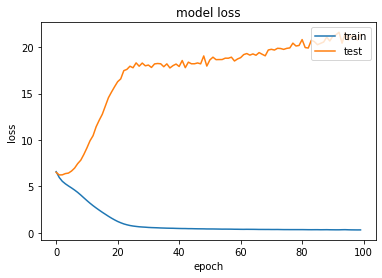

In [13]:
checkpoint = ModelCheckpoint("nextword.hdf5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
lstm = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=128, shuffle=True, callbacks=[checkpoint]).history
plt.plot(lstm['loss'])
plt.plot(lstm['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Results

In [14]:
model = load_model("nextword.hdf5")
tokenizer = pickle.load(open("tokenizer1.pkl", 'rb'))

def predict_next_words(model, tokenizer, text) :
    
    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)
    
    preds = np.argmax(model.predict(sequence))
    predicted_word = ""
    
    for key, value in tokenizer.word_index.items() :
        if value == preds :
            predicted_word = key
            break
    
    return predicted_word

l = ["I am about", "So I have", "To Clotilde Lothman"]
for i in l :
    text = i
    if text == "0" :
        print()
        print("Execution completed...")
        break
    else :
        try :
            text = text.split(" ")
            text = text[-3:]
            print("Input :", i)
            print("Output : ", i, predict_next_words(model, tokenizer, text))
            print()
            
        except Exception as e :
            print("Error occured : ", e)
            continue

Input : I am about
Output :  I am about to

Input : So I have
Output :  So I have heard

Input : To Clotilde Lothman
Output :  To Clotilde Lothman von



### Now using BI-LSTM which means not only forward pred, but backward too

In [15]:
medium_data = pd.read_csv('medium_data.csv')
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [16]:
print("Number of records: ", medium_data.shape[0])
print("Number of fields: ", medium_data.shape[1])

Number of records:  6508
Number of fields:  10


In [17]:
#Remove unwanted symbols
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))

#Tokenize
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8238

In [18]:
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [19]:
#Titles text into sequences and make n_gram model
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  48461


In [20]:
# pad sequences: making all same length 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68])

In [21]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [22]:
print(xs[5])
print(labels[5])
print(ys[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5  676   68    2  452 1518]
14
1.0


Epoch 1/50


C:\Users\ramsu\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1515/1515 [==============================] - 80s 50ms/step - loss: 6.7697 - accuracy: 0.1260
Epoch 2/50
1515/1515 [==============================] - 80s 53ms/step - loss: 5.7313 - accuracy: 0.1804
Epoch 3/50
1515/1515 [==============================] - 84s 56ms/step - loss: 4.8797 - accuracy: 0.2110
Epoch 4/50
1515/1515 [==============================] - 214s 141ms/step - loss: 4.1398 - accuracy: 0.2517
Epoch 5/50
1515/1515 [==============================] - 229s 151ms/step - loss: 3.5902 - accuracy: 0.3057
Epoch 6/50
1515/1515 [==============================] - 210s 139ms/step - loss: 3.2185 - accuracy: 0.3474
Epoch 7/50
1515/1515 [==============================] - 228s 150ms/step - loss: 2.9747 - accuracy: 0.3813
Epoch 8/50
1515/1515 [==============================] - 223s 147ms/step - loss: 2.8107 - accuracy: 0.4035
Epoch 9/50
1515/1515 [==============================] - 221s 146ms/step - loss: 2.6800 - accuracy: 0.4226
Epoch 10/50
1515/1515 [==============================] - 223s 1

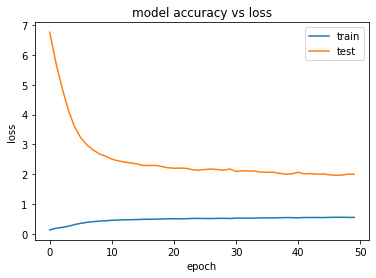

In [24]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(vocab_size, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)
#print model.summary()
print(model)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# import matplotlib.pyplot as plt
# def plot_graphs(history, string):
#     plt.plot(history.history[string])
#     plt.xlabel("Epochs")
#     plt.ylabel(string)
#     plt.show()
# plot_graphs(history, 'accuracy')

#### Results

In [43]:
seed_text = "When i work in python"
next_words = 4
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted=np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

When i work in python make it is unhealthy
